In [1]:
import sys
import os
import numpy as np

In [2]:
from DiffusionAnalysis.loaders import DatDirectoryStructureLoader
from DiffusionAnalysis.trajectory import DisplacementTrajectory
from DiffusionAnalysis.analysis import SimpleMSDAnalysis

In [3]:
loader = DatDirectoryStructureLoader('dat_directory', structures_slice=slice(0,1000))

Loading slice slice(0, 1000, None) from 1000 files


In [4]:
# traj = DisplacementTrajectory(loader, timestep=0.1, time_unit='ps' )

Estimated memory usage: 256.96 MB


In [5]:
# traj.generate_displacement_trajectory(host_atoms=['H'], show_progress=True)
# # #save as a pickle (not implemented in the class)
import pickle
# with open('displacement_traj.pickle', 'wb') as f:
#     pickle.dump(traj, f)

#load the pickle
with open('displacement_traj.pickle', 'rb') as f:
    traj = pickle.load(f)
    


Generating displacement trajectory: 100%|██████████| 1000/1000 [00:18<00:00, 55.41it/s]


Completed with memory usage: 233.60 MB


In [6]:
print(traj.displacement_trajectory[0,:,:])

#sum each timestep to get total displacement
total_displacement = traj.displacement_trajectory.sum(axis=1)
print(total_displacement[0])

#print the traj.displacement_trajectory nbytes in mb
print(traj.displacement_trajectory.nbytes/1e6)
print(traj._check_memory_usage())


[[ 0.          0.          0.        ]
 [-0.02857974 -0.04035663  0.46628415]
 [ 0.06847317  0.10488465 -0.03753486]
 ...
 [ 0.19204007  0.1004566  -0.08268318]
 [ 0.17031777 -0.06169454  0.25172316]
 [-0.13395421  0.0904537   0.1495538 ]]
[ 4.08222245  1.96249885 -0.78232237]
244.944
Estimated memory usage: 256.96 MB
None


In [7]:
loader.reset()

atoms0 = next(loader)
for i in range(8):
    atoms2 = next(loader)

atoms10 = next(loader)

print(atoms0.get_scaled_positions()[0])
print(atoms10.get_scaled_positions()[0])

print(atoms10.get_scaled_positions()[0]- atoms0.get_scaled_positions()[0] )

print(traj.displacement_trajectory.shape)

[0.0267395 0.970661  0.969323 ]
[0.0254682 0.983404  0.96495  ]
[-0.0012713  0.012743  -0.004373 ]
(10206, 1000, 3)


/var/folders/rt/xr_hqkfs0sz5mrr3y_twkckh0000gn/T/ipykernel_8130/2236204534.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()
/var/folders/rt/xr_hqkfs0sz5mrr3y_twkckh0000gn/T/ipykernel_8130/2236204534.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig3.show()


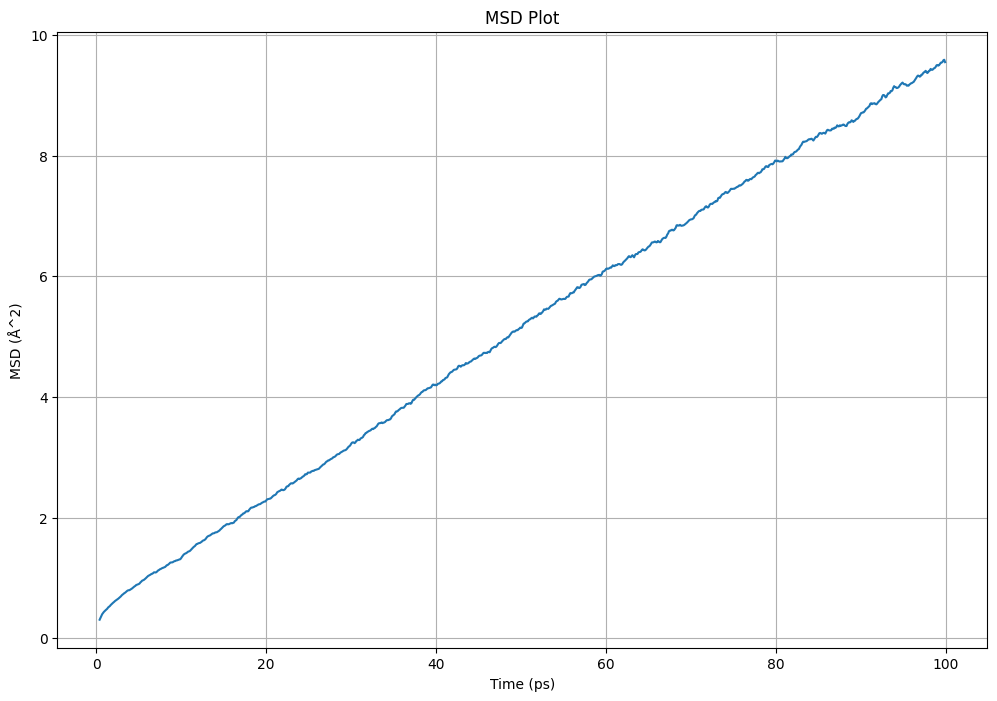

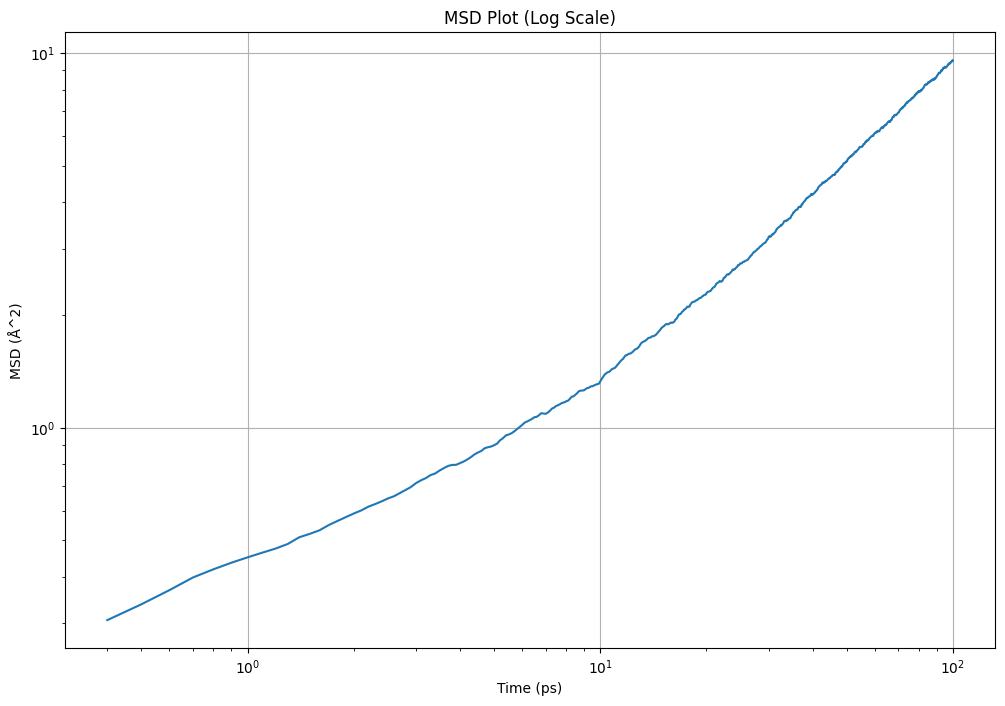

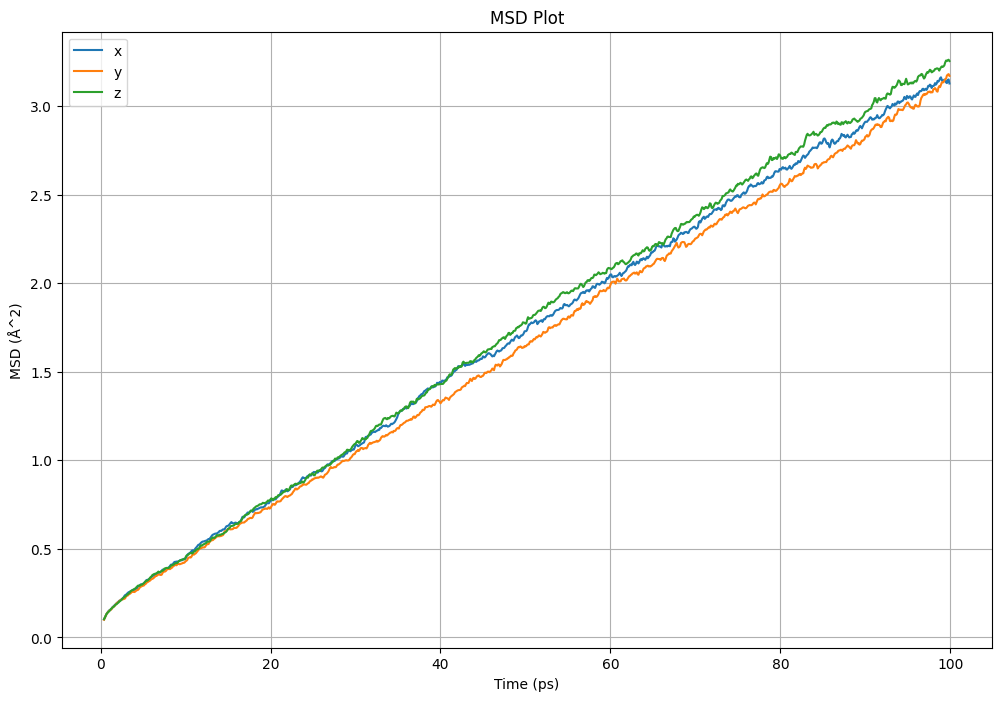

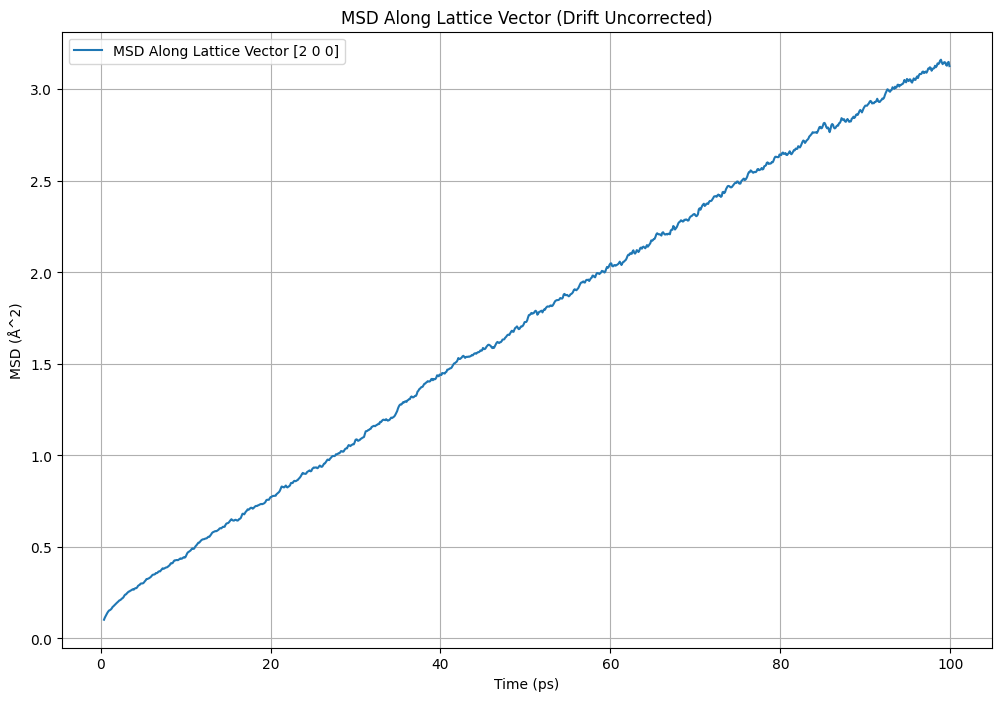

In [8]:
# Create an MSDAnalysis object
msd_analysis = SimpleMSDAnalysis(traj)

# Assuming you have an instance of SimpleMSDAnalysis called 'msd_analysis'

# Calculate the 3D MSD
msd_3d = msd_analysis.calculate_msd(return_3d_msd=True)
fig1 = msd_analysis.plot_msd((msd_3d), title='MSD Plot', legend_loc='upper left', skip_points=4)
fig1_log = msd_analysis.plot_msd((msd_3d), title='MSD Plot (Log Scale)', legend_loc='upper left', skip_points=4, log_scale=True)


# Calculate the MSD for each direction (x, y, z)
msd_x, msd_y, msd_z = msd_analysis.calculate_msd(return_3d_msd=False)

# Plot the MSD for each direction
fig2 = msd_analysis.plot_msd((msd_x, msd_y, msd_z), labels=['x','y' ,'z'], title='MSD Plot', legend_loc='upper left', skip_points=4)
fig2.show()
# Calculate and plot the MSD along a non-normalized lattice vector for host atoms, correcting for framework drift
lattice_vector = np.array([2, 0, 0])  # Example non-normalized lattice vector
msd_along_lattice = msd_analysis.calculate_msd_along_lattice_vector(lattice_vector, atom_indices=msd_analysis.displacement_trajectory.host_atom_indices, correct_drift=False)
fig3 = msd_analysis.plot_msd(msd_along_lattice, labels=f'MSD Along Lattice Vector {lattice_vector}', title='MSD Along Lattice Vector (Drift Uncorrected)', skip_points=4)
fig3.show()


Calculating Van Hove: 100%|██████████| 3402000/3402000 [00:00<00:00, 14436295.56it/s]


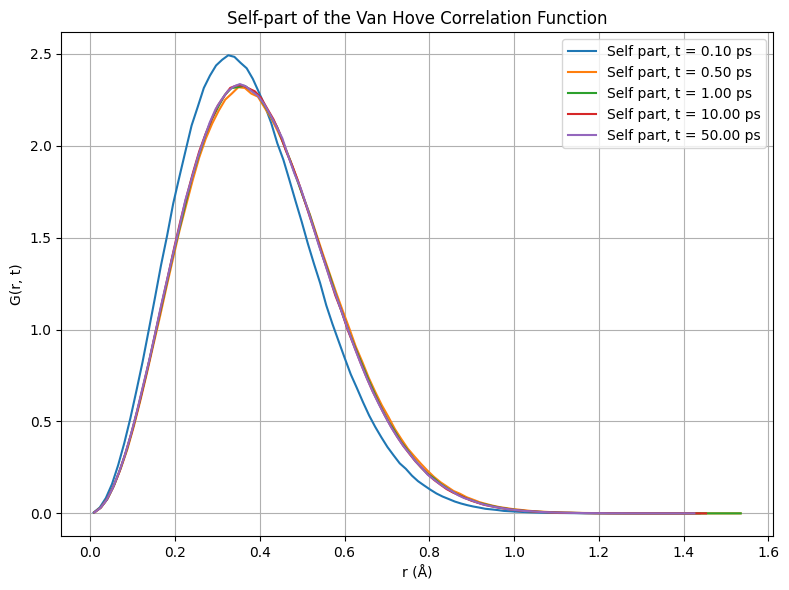

Calculating Van Hove: 100%|██████████| 3402000/3402000 [00:00<00:00, 14716962.39it/s]


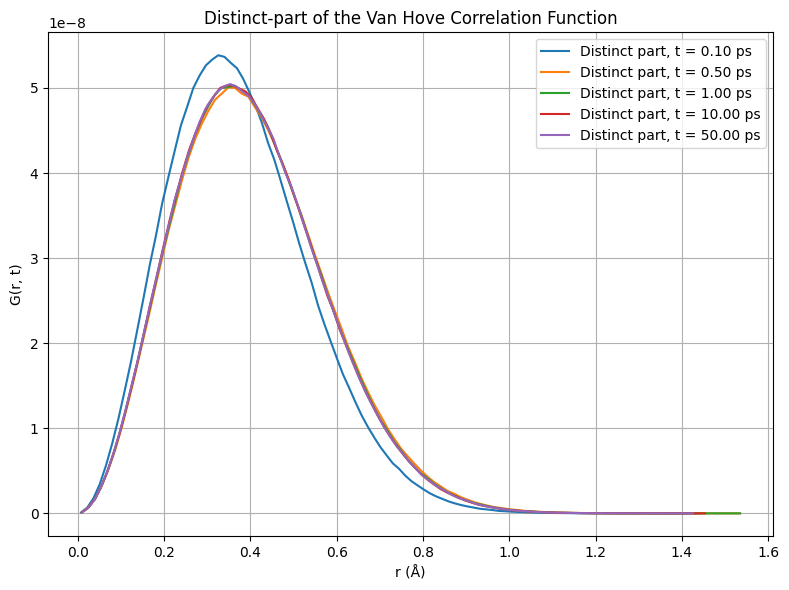

In [9]:
from DiffusionAnalysis.analysis import VanHoveAnalysis
import numpy as np
import matplotlib.pyplot as plt


# Create a VanHoveAnalysis object
van_hove_analyzer = VanHoveAnalysis(traj)

# Set the parameters for the analysis
tau_values = [1, 5, 10, 100, 500]  # Time lags in number of timesteps
r_range = (0, 10)  # Range of distances to consider
n_bins = 100  # Number of bins for the histogram

self_data = []
for tau in tau_values:
    bin_centers, hist = van_hove_analyzer.calculate_van_hove(tau, r_range, n_bins,
                                                             mode='self', )
    self_data.append((bin_centers, hist, tau))

# Plot the self-part of the van Hove correlation function
self_fig = van_hove_analyzer.plot_van_hove(self_data, mode='self', title='Self-part of the Van Hove Correlation Function')
plt.show()

distinct_data = []
for tau in tau_values:
    bin_centers_distinct, hist_distinct = van_hove_analyzer.calculate_van_hove(tau, r_range, n_bins, mode='distinct')
    distinct_data.append((bin_centers_distinct, hist_distinct, tau))

# Plot the distinct-part of the van Hove correlation function
distinct_fig = van_hove_analyzer.plot_van_hove(distinct_data, mode='distinct', title='Distinct-part of the Van Hove Correlation Function')
plt.show()


In [10]:
from DiffusionAnalysis.analysis import tMSDAnalysis

# Create an instance of the tMSDAnalysis class
tmsd_analysis = tMSDAnalysis(traj)

# Define the minimum and maximum time lag values (in steps) and the number of points
min_tau = 1
max_tau = 1000
num_points = 500

# Calculate tMSD
time_lag_values, tMSD_values = tmsd_analysis.calculate_tMSD(min_tau, max_tau, num_points)

# Plot the tMSD data
temperature = 500  # Example temperature value
label = f'{temperature} K'
fig = tmsd_analysis.plot_tMSD(time_lag_values, tMSD_values, label)

fig2 = tmsd_analysis.plot_tMSD_exponent(time_lag_values, tMSD_values, label, average_window_size=10) 




Calculating tMSD:   8%|▊         | 42/500 [00:02<00:23, 19.77it/s]

In [ ]:
import numpy as np

# Create a simple array of exponent values
exponents = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Apply moving average with window_size=3
window_size = 3
kernel = np.ones(window_size) / window_size
smoothed_exponents = np.convolve(exponents, kernel, mode='valid')

print("Original exponents:", exponents)
print("Smoothed exponents:", smoothed_exponents)

Original exponents: [ 1  2  3  4  5  6  7  8  9 10]
Smoothed exponents: [2. 3. 4. 5. 6. 7. 8. 9.]
